In [19]:
pip install py

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# latitudes and longitudes range
lat_rangeOI = (-90, 90)
lng_rangeOI = (-180, 180)

# define url
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# count of passes
count_one = 0
set_one = 1

In [5]:
# array for holding lat and cities
lat_lngs = []
cities = []

# set of random lat and lng combo
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_n_lngs = zip(lats, lngs)

# nearest city for each lat and lng combo
for lat_lng in lat_n_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # create url 
    city = city.replace(" ", "%20")
    
    # If city is unique add to cities array
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [6]:
# lists for DF
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# initial count for organ
count_one = 0
set_one = 1

print(f"Beginning Of Data Retrieval")
print(f"-------------------------------")

# loop creating DF columns
for city in cities:
    try:
        response = requests.get(weather_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")



8 of Set 3 | rawdon
Processing Record 19 of Set 3 | constantine
Processing Record 20 of Set 3 | hithadhoo
Processing Record 21 of Set 3 | tatawin
Processing Record 22 of Set 3 | upernavik
Processing Record 23 of Set 3 | tuatapere
City not found. Skipping...
Processing Record 24 of Set 3 | broome
Processing Record 25 of Set 3 | kuldur
Processing Record 26 of Set 3 | vikulovo
Processing Record 27 of Set 3 | imbituba
Processing Record 28 of Set 3 | daru
Processing Record 29 of Set 3 | thompson
Processing Record 30 of Set 3 | sao%20jose%20da%20coroa%20grande
Processing Record 31 of Set 3 | khani
Processing Record 32 of Set 3 | huntsville
Processing Record 33 of Set 3 | maniitsoq
Processing Record 34 of Set 3 | mutis
Processing Record 35 of Set 3 | souillac
Processing Record 36 of Set 3 | ballina
Processing Record 37 of Set 3 | acari
Processing Record 38 of Set 3 | ullapool
Processing Record 39 of Set 3 | moose%20factory
Processing Record 40 of Set 3 | sibu
Processing Record 41 of Set 3 | l

In [7]:
#  Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

# DF dictionary
df__dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_df = pd.DataFrame(df__dict)

# output data to csv
weather_df.to_csv(output_data_file)

weather_df.count()


City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [8]:
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,codrington,0,AU,1580270296,63,-38.27,141.97,68.23,4.43
1,balkanabat,11,TM,1580270719,42,39.51,54.37,40.32,13.98
2,jamestown,90,US,1580270720,86,42.10,-79.24,30.99,11.41
3,tuktoyaktuk,90,CA,1580270720,75,69.45,-133.04,-18.40,5.82
4,yumen,0,CN,1580270288,32,40.28,97.20,26.40,11.25


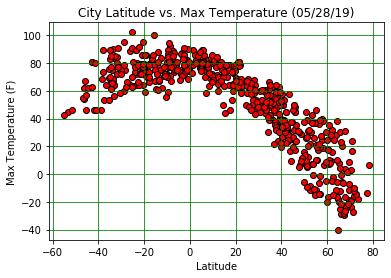

In [9]:
#  Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

#  Latitude vs. Temperature Plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="green")
plt.savefig("output_data/fig1.png")
plt.show()

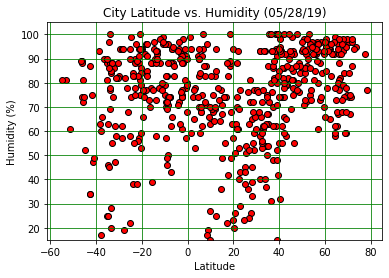

In [10]:
# Latitude vs. Humidity Plot

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="green")
plt.savefig("output_data/fig2.png")
plt.show()

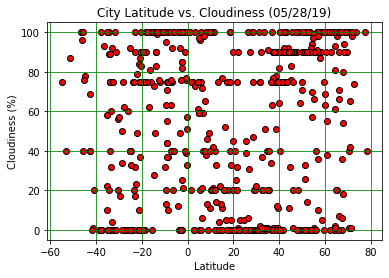

In [12]:
# Latitude vs. Cloudiness Plot

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="green")
plt.savefig("output_data/fig3.png")
plt.show()


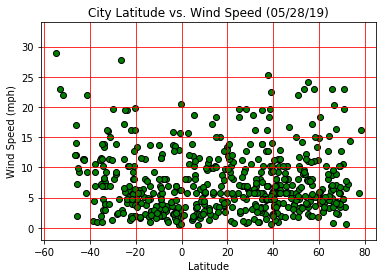

In [14]:
# Latitude vs. Wind Speed Plot

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")
plt.savefig("output_data/fig4.png")
plt.show()